In [1]:
#Importando Biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Carregando conjunto de dados
saude_df = pd.read_csv('heart_data.csv')

In [3]:
#Explorando o conjunto de dados
saude_df.head()



,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#explorando as ultimas linhas do conjunto de dados
saude_df.tail()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
print("Quantidade de colunas:", saude_df.shape[0])
print("Quantidade de linhas:", saude_df.shape[1]).setdefault()


Quantidade de colunas: 70000
Quantidade de linhas: 14


In [6]:
# Criando coluna de IMC
saude_df['IMC'] = 10000*saude_df['weight']/(saude_df['height']*saude_df['height'])

In [7]:
%%timeit

condicoes = [
    (saude_df['IMC'] < 18.5),
    ((saude_df['IMC'] >= 18.5) & (saude_df['IMC']< 25)),
    ((saude_df['IMC'] >= 25) & (saude_df['IMC']< 30)),
    (saude_df['IMC'] >= 30) 

]

classificacao = ['baixo_peso', 'normal', 'sobrepeso', 'obesidade']
saude_df['class_imc'] = np.select(condicoes, classificacao, default=np.nan)

25.1 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
#Organizando Dataframe
saude_df['gender'] = saude_df['gender'].replace(1, 'H')
saude_df['gender'] = saude_df['gender'].replace(2, 'M')

In [9]:
#renomeando colunas
saude_df.rename(columns={'age' : 'idade'}, inplace=True)
saude_df.rename(columns={'gender' : 'genero'}, inplace=True)
saude_df.rename(columns={'height' : 'altura'}, inplace=True)
saude_df.rename(columns={'weight' : 'peso'}, inplace=True)
saude_df.rename(columns={'cholesterol' : 'colesterol'}, inplace=True)
saude_df.rename(columns={'gluc' : 'glicemia'}, inplace=True)
saude_df.rename(columns={'smoke' : 'fumante'}, inplace=True)
saude_df.rename(columns={'alco' : 'alcool'}, inplace=True)


In [10]:
saude_df['idade'] = [row // 1000 for row in saude_df['idade']]

In [11]:
#Verificando se há dados duplicados no dataframe
saude_df.duplicated().sum()

0

In [12]:
#Explorando o conjunto de dados novamente
saude_df.head()

,index,id,idade,genero,altura,peso,ap_hi,ap_lo,colesterol,glicemia,fumante,alcool,active,cardio,IMC,class_imc
0,0,0,18,M,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal
1,1,1,20,H,156,85.0,140,90,3,1,0,0,1,1,34.927679,obesidade
2,2,2,18,H,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal
3,3,3,17,M,169,82.0,150,100,1,1,0,0,1,1,28.710479,sobrepeso
4,4,4,17,H,156,56.0,100,60,1,1,0,0,0,0,23.011177,normal


In [13]:
# Examinando os tipos dos dados
saude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       70000 non-null  int64  
 1   id          70000 non-null  int64  
 2   idade       70000 non-null  int64  
 3   genero      70000 non-null  object 
 4   altura      70000 non-null  int64  
 5   peso        70000 non-null  float64
 6   ap_hi       70000 non-null  int64  
 7   ap_lo       70000 non-null  int64  
 8   colesterol  70000 non-null  int64  
 9   glicemia    70000 non-null  int64  
 10  fumante     70000 non-null  int64  
 11  alcool      70000 non-null  int64  
 12  active      70000 non-null  int64  
 13  cardio      70000 non-null  int64  
 14  IMC         70000 non-null  float64
 15  class_imc   70000 non-null  object 
dtypes: float64(2), int64(12), object(2)
memory usage: 8.5+ MB


In [14]:
#Resumo Estátisticos 
saude_df.describe

<bound method NDFrame.describe of        index     id  idade genero  altura   peso  ap_hi  ap_lo  colesterol  \
0          0      0     18      M     168   62.0    110     80           1   
1          1      1     20      H     156   85.0    140     90           3   
2          2      2     18      H     165   64.0    130     70           3   
3          3      3     17      M     169   82.0    150    100           1   
4          4      4     17      H     156   56.0    100     60           1   
...      ...    ...    ...    ...     ...    ...    ...    ...         ...   
69995  69995  99993     19      M     168   76.0    120     80           1   
69996  69996  99995     22      H     158  126.0    140     90           2   
69997  69997  99996     19      M     183  105.0    180     90           3   
69998  69998  99998     22      H     163   72.0    135     80           1   
69999  69999  99999     20      H     170   72.0    120     80           2   

       glicemia  fumante  alc

In [15]:
#Será que a distribuição é maior no sexo masculino ou no sexo feminino?
saude_df['genero'].value_counts()

genero
H    45530
M    24470
Name: count, dtype: int64

C:\Users\Mathe\AppData\Local\Temp\ipykernel_8720\1632306067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genero', data=saude_df, palette='Set2')


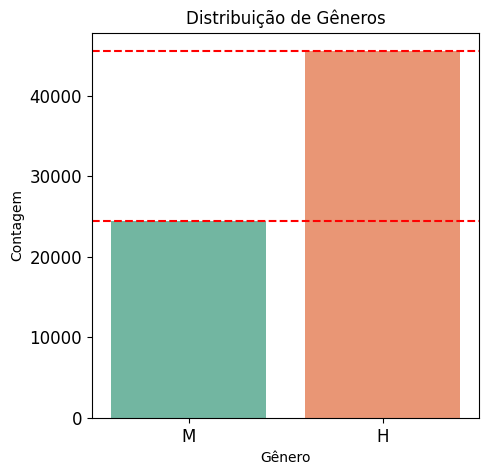

In [16]:
plt.figure(figsize=(5, 5))
genero_ref = [45530, 24470]
for genero in genero_ref:
    plt.axhline(y=genero, color='red', linestyle='--', label=f'Ref {genero}')
sns.countplot(x='genero', data=saude_df, palette='Set2')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Distribuição de Gêneros')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [17]:
#Qual é a faixa etária predominante entre os usuários?
#Podemos observar que a faixa etária mais predominante está entre 18  21 anos.
saude_df['idade'].value_counts()

idade
21    11521
19    10343
18    10147
20     8490
22     6390
16     5659
23     4923
15     4751
17     4368
14     3404
10        4
Name: count, dtype: int64

C:\Users\Mathe\AppData\Local\Temp\ipykernel_8720\947198060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='idade', data=saude_df, palette='viridis')


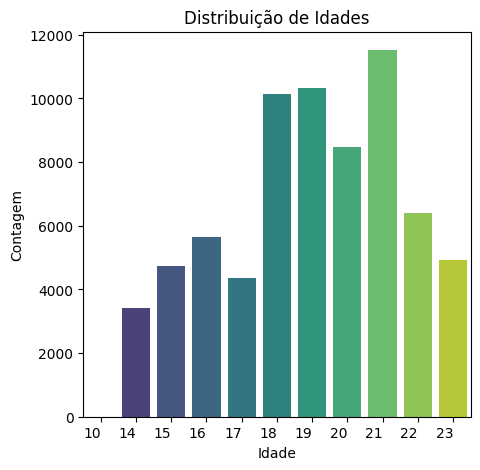

In [18]:
plt.figure(figsize=(5, 5))
sns.countplot(x='idade', data=saude_df, palette='viridis')
plt.xticks(rotation=0, ha='right')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Distribuição de Idades')
plt.show()


In [19]:
saude_df['idade'].describe()

count    70000.000000
mean        18.978200
std          2.480826
min         10.000000
25%         17.000000
50%         19.000000
75%         21.000000
max         23.000000
Name: idade, dtype: float64

In [20]:
#Qual faixa etária é mais comum em cada gênero entre os usuários?
saude_df.groupby('genero')['idade'].value_counts()

genero  idade
H       21       7685
        19       6893
        18       6836
        20       5751
        22       4025
        16       3428
        23       3168
        15       2926
        17       2656
        14       2159
        10          3
M       21       3836
        19       3450
        18       3311
        20       2739
        22       2365
        16       2231
        15       1825
        23       1755
        17       1712
        14       1245
        10          1
Name: count, dtype: int64

In [21]:
#Qual é a categoria de Índice de Massa Corporal (IMC) com o maior número de ocorrências?
saude_df['class_imc'].value_counts()


class_imc
normal        25667
sobrepeso     25209
obesidade     18474
baixo_peso      650
Name: count, dtype: int64

C:\Users\Mathe\AppData\Local\Temp\ipykernel_8720\4273812860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class_imc', data=saude_df, palette='viridis')


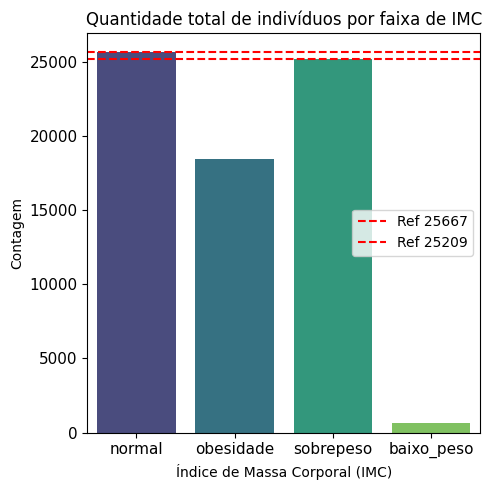

In [22]:
plt.figure(figsize=(5, 5))
sns.countplot(x='class_imc', data=saude_df, palette='viridis')
grupo_ref = [25667, 25209]
for grupo in grupo_ref:
    plt.axhline(y=grupo, color='red', linestyle='--', label=f'Ref {grupo}')
plt.xlabel('Índice de Massa Corporal (IMC)')
plt.ylabel('Contagem')
plt.title('Quantidade total de indivíduos por faixa de IMC')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.legend()
plt.show()

In [23]:
#Qual gênero apresenta a taxa mais alta de tabagismo?
saude_df.groupby('genero')['fumante'].value_counts()


genero  fumante
H       0          44717
        1            813
M       0          19114
        1           5356
Name: count, dtype: int64

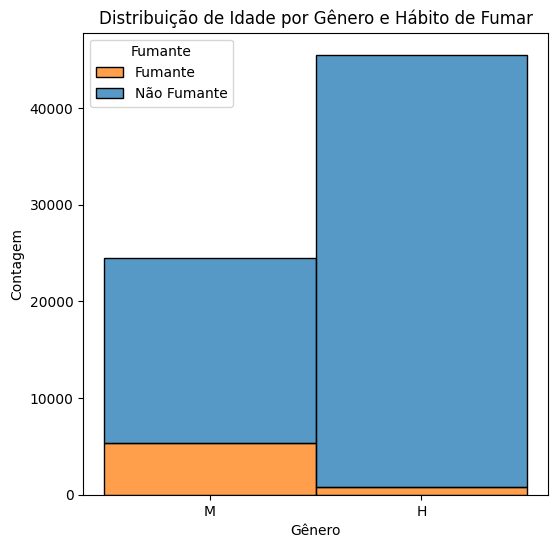

In [24]:
plt.figure(figsize=(6, 6))
sns.histplot(data=saude_df, x="genero", hue="fumante", multiple='stack', bins=15)
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.title("Distribuição de Idade por Gênero e Hábito de Fumar")
plt.legend(title="Fumante", labels=["Fumante", "Não Fumante"])
plt.show()


In [25]:
saude_df.groupby(['idade', 'active']).value_counts()

idade  active  index  id     genero  altura  peso  ap_hi  ap_lo  colesterol  glicemia  fumante  alcool  cardio  IMC        class_imc
10     1       6219   8850   H       175     59.0  120    80     1           1         0        0       0       19.265306  normal       1
               22343  31922  M       175     92.0  100    60     1           1         0        0       0       30.040816  obesidade    1
               30666  43842  H       159     59.0  120    80     1           1         0        0       0       23.337684  normal       1
               55905  79749  H       160     59.0  110    70     1           1         0        0       0       23.046875  normal       1
14     0       68554  97928  H       165     82.0  120    80     1           1         0        0       0       30.119376  obesidade    1
                                                                                                                                       ..
23     1       17283  24696  H       16

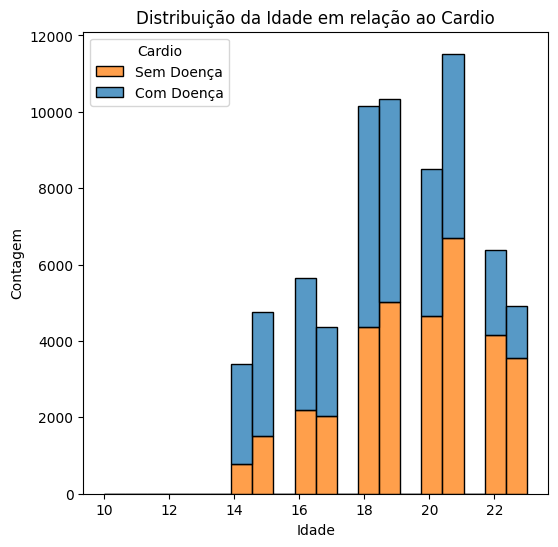

In [26]:
plt.figure(figsize=(6, 6))
sns.histplot(data=saude_df, x="idade", hue="cardio", multiple='stack', bins=20)
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.title("Distribuição da Idade em relação ao Cardio")
plt.legend(title="Cardio", labels=["Sem Doença", "Com Doença"])
plt.show()


In [27]:
#Em que faixa etária e classe de gênero o tabagismo é mais prevalente?
saude_df.groupby(['class_imc', 'fumante', 'genero'])['idade'].value_counts()



class_imc   fumante  genero  idade
baixo_peso  0        H       18        62
                             21        52
                             19        51
                             15        49
                             14        47
                                     ... 
sobrepeso   1        M       22       203
                             15       180
                             17       157
                             14       111
                             23       110
Name: count, Length: 162, dtype: int64

idade                      10   14    15    16   17    18    19    20    21  \
class_imc  fumante genero                                                     
baixo_peso 0       H        0   47    49    38   26    62    51    43    52   
                   M        0   18    14    11   16    18    19    11    27   
           1       H        0    2     3     1    1     3     3     1     1   
                   M        0    5     3     9    4     7    10     7     4   
normal     0       H        3  982  1251  1392  924  2502  2447  1829  2386   
                   M        0  471   601   759  536   987  1100   769  1145   
           1       H        0   18    26    25   20    25    35    23    36   
                   M        0  129   215   200  156   302   276   226   258   
obesidade  0       H        0  429   662   863  705  1827  1894  1792  2567   
                   M        1  131   206   287  246   492   531   448   688   
           1       H        0   16    26    29   19 

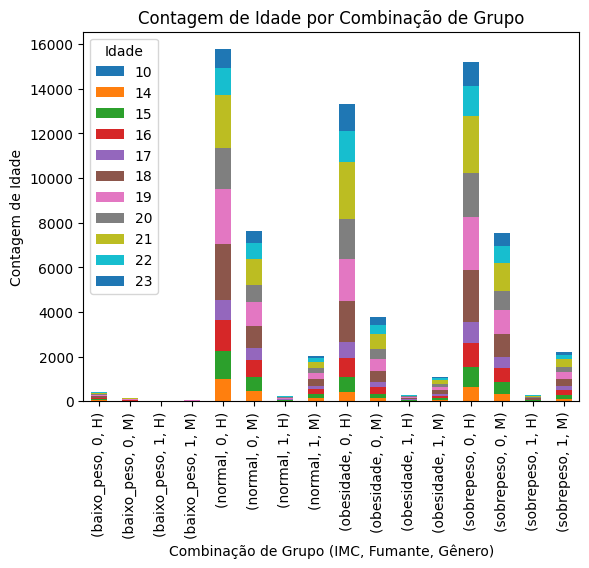

In [28]:
grouped_data = saude_df.groupby(['class_imc', 'fumante', 'genero'])['idade'].value_counts().unstack(fill_value=0)
print(grouped_data)
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Combinação de Grupo (IMC, Fumante, Gênero)')
plt.ylabel('Contagem de Idade')
plt.title('Contagem de Idade por Combinação de Grupo')
plt.legend(title='Idade')
plt.show()


C:\Users\Mathe\AppData\Local\Temp\ipykernel_8720\1335947956.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saude_df['peso'])


<Axes: xlabel='peso', ylabel='Density'>

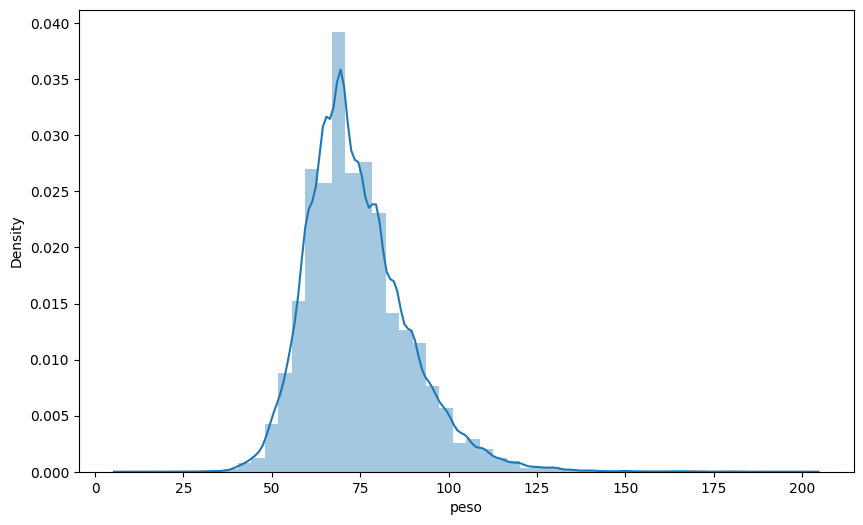

In [29]:
fig = plt.figure(figsize=(10,6))
sns.distplot(saude_df['peso'])

In [30]:
saude_df['peso'].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: peso, dtype: float64

C:\Users\Mathe\AppData\Local\Temp\ipykernel_8720\451101317.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saude_df['altura'])


<Axes: xlabel='altura', ylabel='Density'>

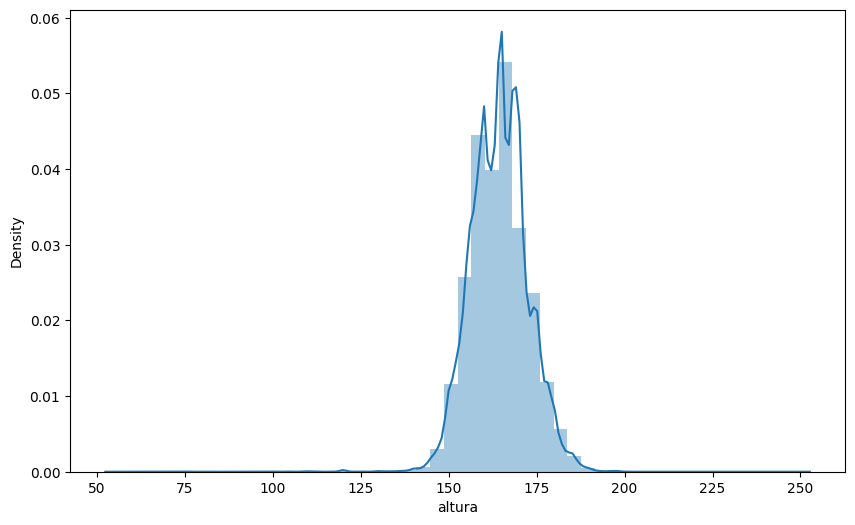

In [31]:
fig = plt.figure(figsize=(10,6))
sns.distplot(saude_df['altura'])

In [32]:
saude_df['altura'].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: altura, dtype: float64

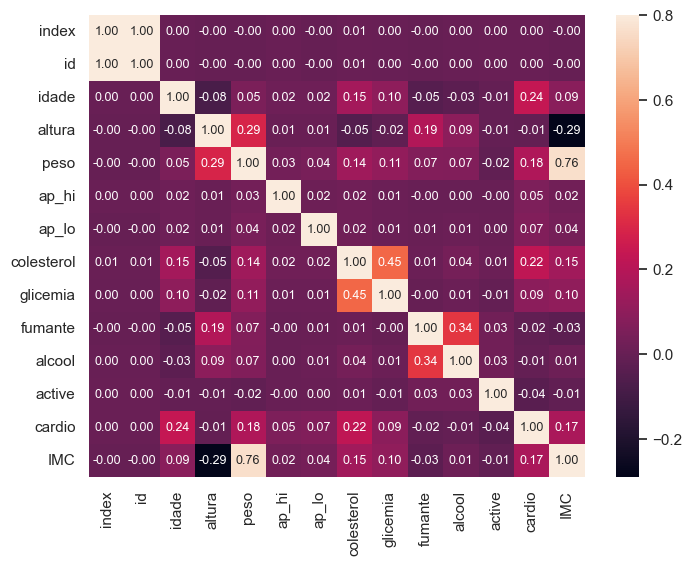

In [33]:

numeric_columns = saude_df.select_dtypes(include=[float, int]).columns
numeric_matrix = saude_df[numeric_columns].corr()
sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(numeric_matrix, vmax=0.8, annot_kws={'size': 9}, annot=True, fmt='.2f')
plt.show()
